# Update for 2025-03-29 - 2025-04-05

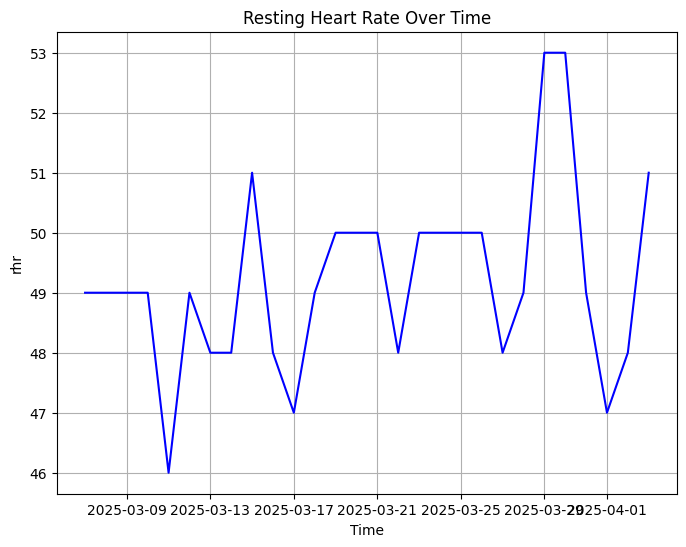

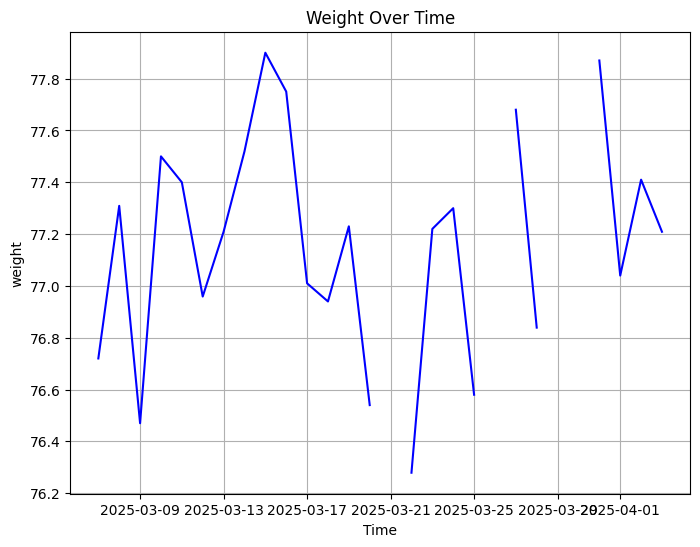

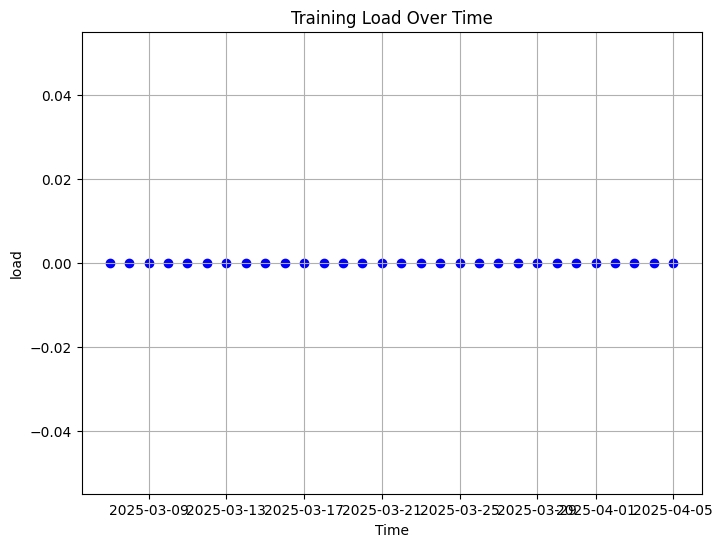

In [1]:
import datetime
import logging

from IPython.display import display, Markdown
import snakemd

from garmindb import GarminConnectConfigManager
from garmindb.garmindb import GarminDb, Attributes, ActivitiesDb, Activities

from graphs import Graph


logging.basicConfig(filename='weekly.log', filemode='w', level=logging.INFO)
logger = logging.getLogger("weekly")


def match_day(day, data):
    for entry in data:
        if entry.start_time.date() == day:
            return entry.training_load
    return 0.0

def activities_to_sequence(days, data):
    sequence = []
    for day in days:
        sequence.append(match_day(day, data))
    return sequence


gc_config = GarminConnectConfigManager()
db_params_dict = gc_config.get_db_params()

num_of_days = 30

garmin_db = GarminDb(db_params_dict)
garmin_act_db = ActivitiesDb(db_params_dict)
measurement_system = Attributes.measurements_type(garmin_db)

doc = snakemd.new_doc()

end_ts = datetime.datetime.now()
start_ts = datetime.datetime.now() - datetime.timedelta(days=7)

doc.add_heading(f"Update for {start_ts.date()} - {end_ts.date()}")
display(Markdown(str(doc)))

graph = Graph()

graph.graph_activity('rhr', 'days', num_of_days)


graph.graph_activity('weight', 'days', num_of_days)

days = [datetime.date.today() - datetime.timedelta(days=day) for day in range(num_of_days)]
data = Activities.get_for_period(garmin_act_db, start_ts, end_ts)
training_load = activities_to_sequence(days, data)
graph._graph_scatter(days, training_load, 'Training Load', 'load')
